# COMP 6321 Assignment 1

In this assignment you'll be clustering and classifying emojis!

<div style="margin-top:10px">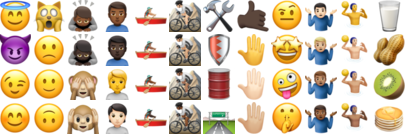</div>

The assignment is very much like a lab. It is broken into many small and specific steps that build on each other. The main differences are:
1. the assignment combines multiple concepts together,
3. the assignment will be carefully graded, and
2. where <span style="color:#080;font-weight:bold">specified</span>, you must add comments to your code.

There are 5 questions: Q1 (20 marks), Q2 (20 marks), Q3 (20 marks), Q4 (10 marks), Q5 (10 marks) and one bonus question Q6 (10 marks).

**Rules for academic integrity**:
* Like labs, students are encouraged to ask conceptual questions of TAs and of other students, and can answer each others' conceptual questions.
* Unlike labs, students are not allowed to post example code in a public forum, even if the code is wrong; code and pseudocode can only be shared with TAs when requesting help.
* Never ask for, or offer, code snippets for the assignment to your fellow students. Doing so is forbidden, and is a major violation of academic integrity, both of the person who shared the code and the person who accepted the code. Violations of academic integrity will be reported to the Dean's Office. Violators risk their academic standing.

**Advice:**
* *Invest in plotting.* Plotting is super important for ML and for data sciences generally. So, put in the time to learn how to make good plots, efficiently!
* *Always set random seeds.* Some steps of the assignment involve randomness, even if you do not explicitly ask for it. In order to make your assignment reproducible, you must set scikit-learn's *random_state* to a constant (e.g., to 0) whenever applicable.
* *Save your notebook frequently.* Although Jupyter notebooks are mostly reliable, it is possible to encounter an erroneous state, where the most recent changes cannot be saved to disk by the notebook's own save functionality.

**Run the code cell below** to import the necessary packages.

In [1]:
import os                        # for os.path.exists
import json                      # for loading metadata
import urllib                    # for downloading remote files 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import sklearn.preprocessing

# Matplotlib might complain that a lot of figures are open, but suppress that warning.
plt.rcParams.update({'figure.max_open_warning': 0})

**Run the code cell below** to define some utility functions for fetching data and for processing images.

In [2]:
def download(remoteurl: str, localfile: str):
    """
    Download remoteurl to localfile, unless localfile already exists.
    Returns the localfile string.
    """
    if not os.path.exists(localfile):
        print("Downloading %s..." % localfile)
        filename, headers = urllib.request.urlretrieve(remoteurl, localfile)
    return localfile

def rgba_to_rgb(image):
    """
    Converts image from RGBA format (H,W,4) to RGB format (H,W,3).
    Returns the new RGB image.
    """
    assert image.ndim == 3, "Expected 3-dimensional array"
    assert image.shape[2] == 4, "Expected 4 colour channels"
    assert image.max() <= 1, "Expected color values in range [0,1]"
    rgb, a = np.split(image, [3], axis=2)  # Split into (H,W,3) and (H,W,1)
    return a*rgb + (1-a)                   # Apply alpha blending to get RGB

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q1 &mdash; Download emoji metadata and images [20 marks total]

The image data and corresponding metadata that you need for this assignment is available from [github.com/imcal/emoji-data](https://github.com/iamcal/emoji-data), where you can also find a description of the data. The specific files you'll need are only:
* *emoji.json*
* *sheets-clean/sheet_{vendor}_{size}_clean.png*

where *{vendor}* is one of *{apple, facebook, google, twitter}* and *{size}* is the pixel resolution. You'll need emojis from all four vendors, but only the small *16x16* pixel versions (to make training faster). However, do NOT download the files manually.

<div style="border-bottom: 1px solid black;"></div>

### *Q1a &mdash;  Write code to download the files [5 marks]*

Use the *download* function defined above to fetch the five files *procedurally*. 

*Hint:* When you visit a Github URL in your browser, Github normally returns an HTML file for rendering in your web browser. To ask Github for an actual raw file (instead of the web page for displaying that file) you must use special URLs. If you view a file in your web browser https://github.com/iamcal/emoji-data/{path_to_file} then you should use URL https://github.com/iamcal/emoji-data/raw/master/{path_to_file}.

In [3]:
cd

C:\Users\Ghaemmags


In [4]:
# Your code here. Use as many lines as you need.
# Feel free to define global variables like EMOJI_SIZE=16 for later use.
EMOJI_SIZE=16
download("https://github.com/iamcal/emoji-data/raw/master/emoji.json","C:\\Users\\Ghaemmags\\emoji.json")
for item in ["apple", "facebook", "google", "twitter"]:
    download(("https://github.com/iamcal/emoji-data/raw/master/sheets-clean/sheet_"+(item)+"_16_clean.png"),("C:\\Users\\Ghaemmags\\sheet_"+(item)+".png"))

<div style="border-bottom: 1px solid black;"></div>

### *Q1b &mdash;  Load and inspect the emoji metadata [5 marks]*

The emoji metadata is contained in a JSON file, which Python's **[json](https://docs.python.org/3/library/json.html)** module can easily load and parse for you.

**Write code** to load the *emoji.json* file, then display the metadata for the first emoji (index 0) so that you can see an example. It should have short name '*hash*'.

In [5]:
# Your answer here. Aim for 2-4 lines.
# Keep the metadata in a global variable that you can keep referring to.

# Opening JSON file
file = open('emoji.json',)
 
# returns JSON object as a dictionary
data = json.load(file)
data[0]

{'name': 'HASH KEY',
 'unified': '0023-FE0F-20E3',
 'non_qualified': '0023-20E3',
 'docomo': 'E6E0',
 'au': 'EB84',
 'softbank': 'E210',
 'google': 'FE82C',
 'image': '0023-fe0f-20e3.png',
 'sheet_x': 0,
 'sheet_y': 0,
 'short_name': 'hash',
 'short_names': ['hash'],
 'text': None,
 'texts': None,
 'category': 'Symbols',
 'subcategory': 'keycap',
 'sort_order': 1463,
 'added_in': '0.6',
 'has_img_apple': True,
 'has_img_google': True,
 'has_img_twitter': True,
 'has_img_facebook': False}

**Write code** to find the index of the emoji having short name *'laughing'*, then display its metadata (the *dict* object). Do not use the *sort_order* field of the emoji metadata, it is not relevant to this assignment.

In [6]:
# Your answer here. Aim for 1-5 lines. Keep the index in a global variable for later.
for item in range(len(data)):
    if data[item]["short_name"]=="laughing":
        print(data[item])
        break

{'name': 'SMILING FACE WITH OPEN MOUTH AND TIGHTLY-CLOSED EYES', 'unified': '1F606', 'non_qualified': None, 'docomo': 'E72A', 'au': 'EAC5', 'softbank': None, 'google': 'FE332', 'image': '1f606.png', 'sheet_x': 32, 'sheet_y': 58, 'short_name': 'laughing', 'short_names': ['laughing', 'satisfied'], 'text': None, 'texts': [':>', ':->'], 'category': 'Smileys & Emotion', 'subcategory': 'face-smiling', 'sort_order': 5, 'added_in': '0.6', 'has_img_apple': True, 'has_img_google': True, 'has_img_twitter': True, 'has_img_facebook': True}


In [7]:
index_laugh=item

<div style="border-bottom: 1px solid black;"></div>

### *Q1c &mdash;  Load and inspect the emoji image data [10 marks]*

The emoji image data is contained in PNG files, which Matplotlib's **[imread](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.imread.html)** function can load as a Numpy array. The image format is RGBA (*red*, *green*, *blue*, *alpha*) where *alpha* determines the opacity of each pixel.

**Write code** to load the four emoji sheet images. The list of images should be in order *{apple,facebook,google,twitter}*.

In [8]:
# Your answer here. Aim for 1-4 lines. You can define a global variable to hold the list of numpy arrays.
png_files={}
for item in ["apple", "facebook", "google", "twitter"]:
    png_files[item] = plt.imread("C:\\Users\\Ghaemmags\\sheet_"+(item)+".png")


**Write code** to plot each vendor's sheet image. Generate four separate plots, where the title of each plot should be "*vendor* (*height*, *width*, *channels*)" where *height* and *width* are the size of the sheet and *channels* is the number of colour channels. Use the *figsize* argument of Matplotlib's *figure* function to enlarge the figures. The top of your first plot should look like this:

<div>
    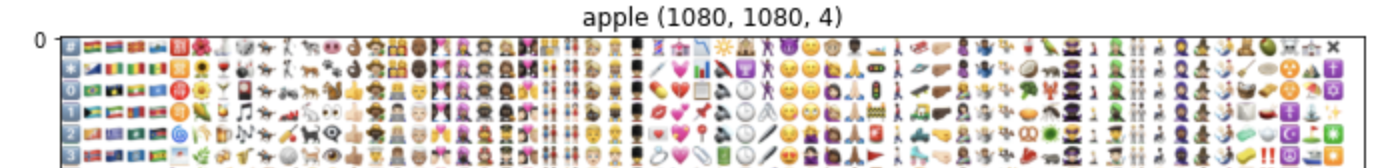
</div>


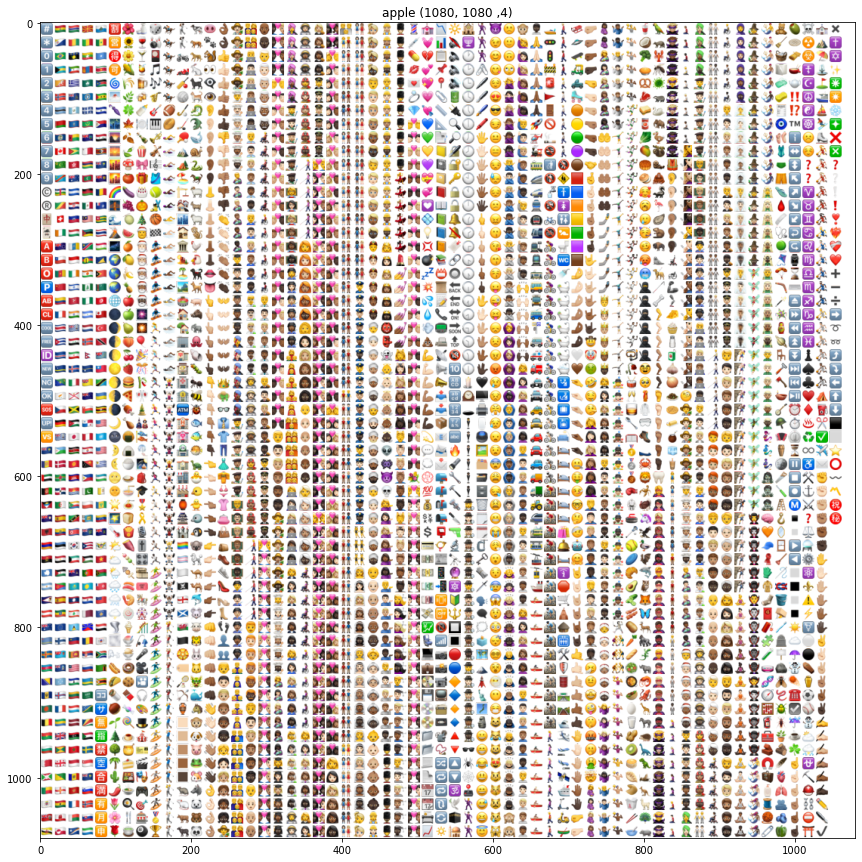

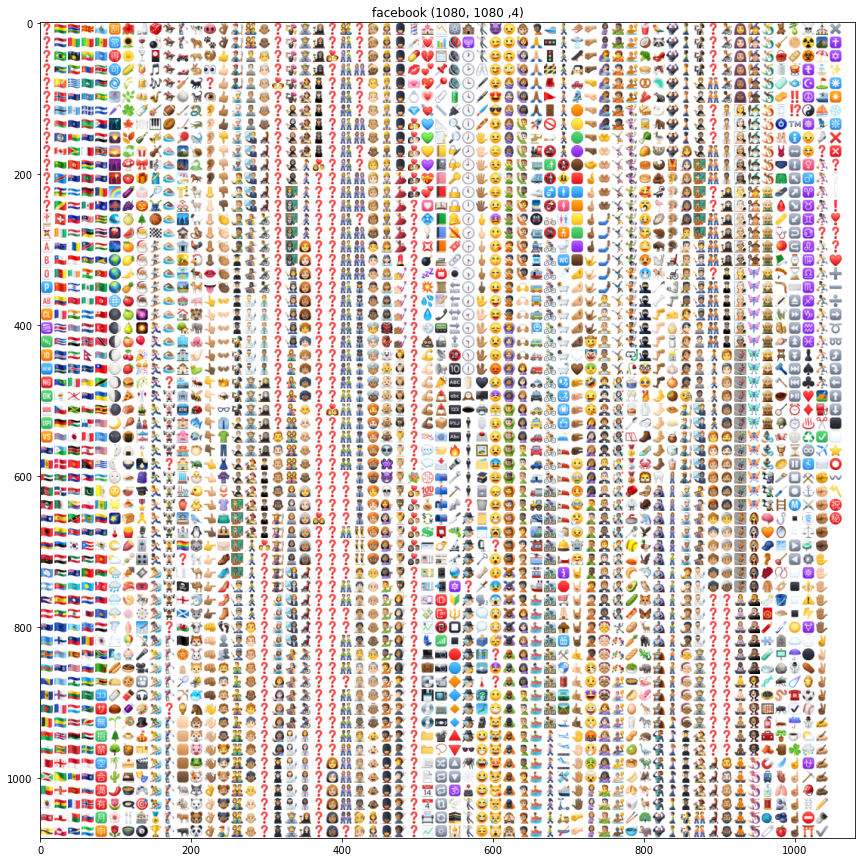

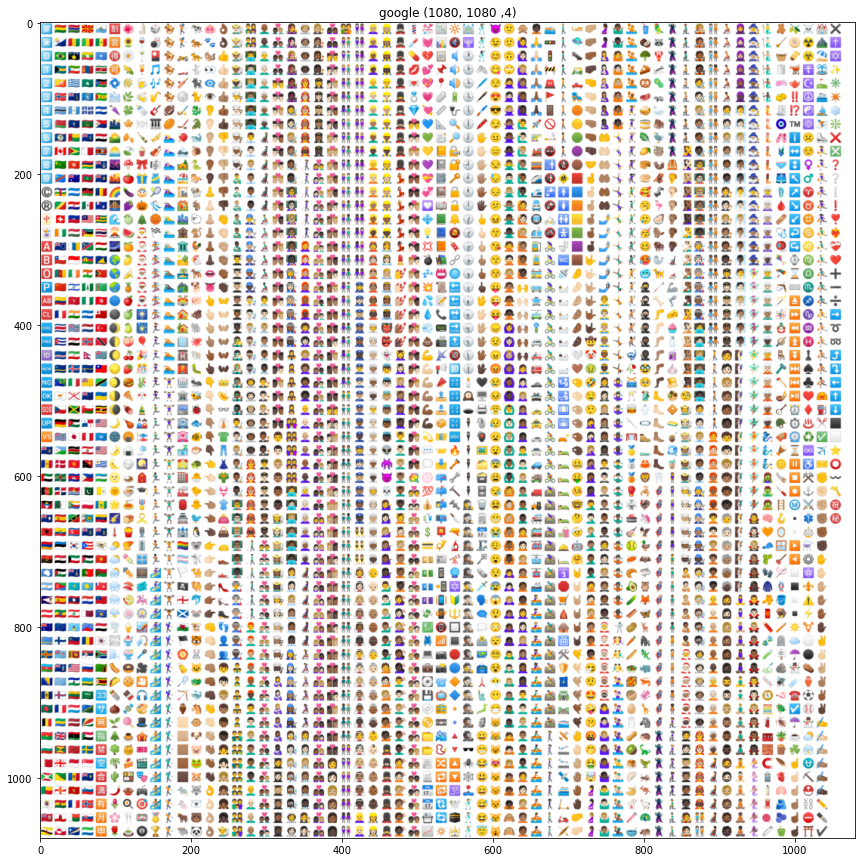

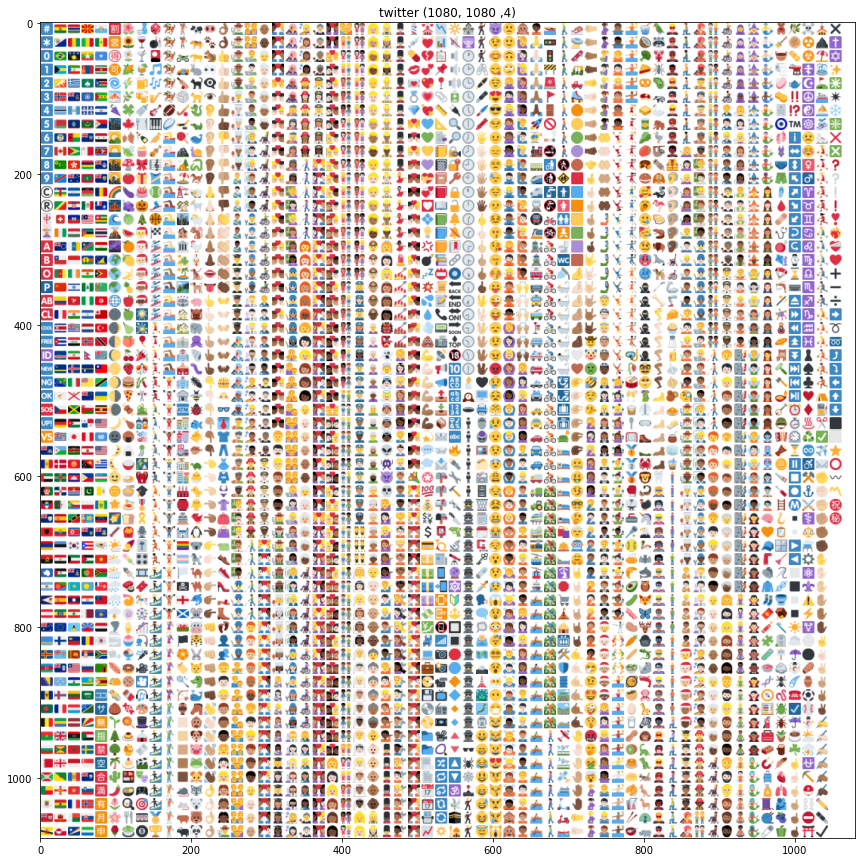

In [9]:
# Your answer here. Aim for 4-6 lines.
for t in png_files.items():
    plt.figure(figsize=(15, 15))
    plt.imshow(t[1]);
    plt.title(t[0]+" ("+str(t[1].shape[0])+", "+str(t[1].shape[1])+" ,"+str(t[1].shape[2])+")")


**Write code** to generate the same four plots as above, except use Numpy slicing to display only the first 3 rows and 8 columns of the sheet. To ensure you do not crop any emojis, take note of any "padding" between the 16x16 emojis in the sheet. Your first plot should look like this, but with the shape numbers (?) and axis ticks filled in:

<div style="margin-top:10px">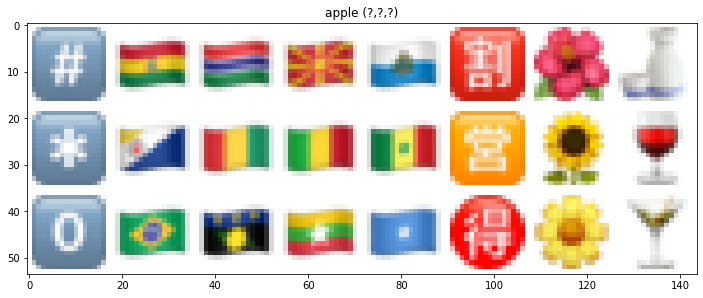</div>

(If you see a red question mark like <span style="color:red">?</span> for a vendor, it means they do not provide that particular emoji.)

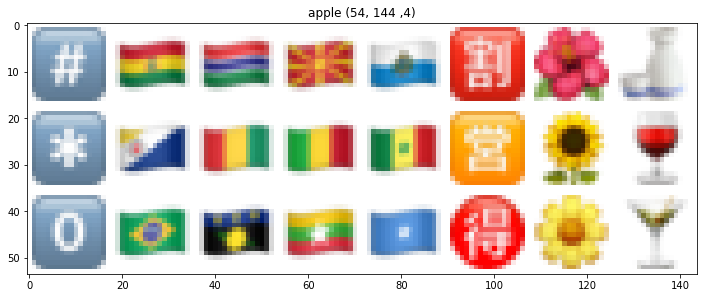

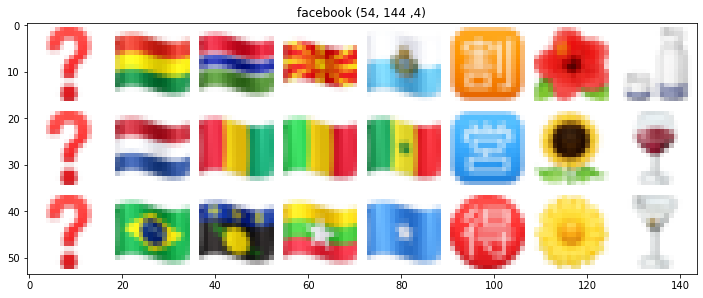

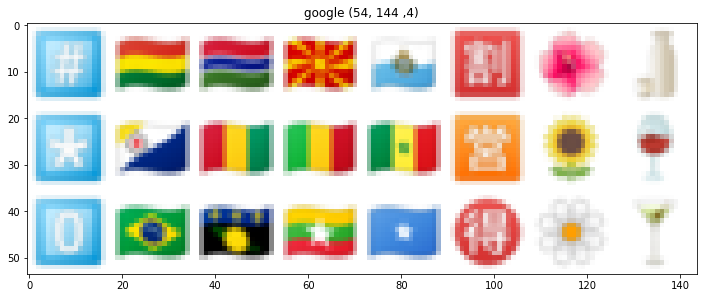

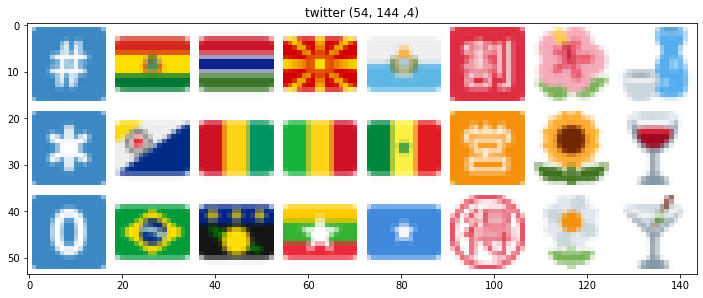

In [10]:
# Your answer here. Aim for 5-9 lines.
for t in png_files.items():
    plt.figure(figsize=(12, 12))
    plt.imshow(t[1][:54,:144,:]);
    plt.title(t[0]+" ("+str(t[1][:54,:144,:].shape[0])+", "+str(t[1][:54,:144,:].shape[1])+" ,"+str(t[1][:54,:144,:].shape[2])+")")
    #plt.title(t[0]+" (?,?,?)")


**Implement *get_emoji_image*.** It should extract a 16x16 RGBA emoji image by its style index (0=*apple*, 1=*facebook*, 2=*google*, 3=*twitter*) and emoji index (as they appear in *emoji.json*). Internally, your function may refer to any global variables you have already defined (metadata, images, size, padding). Use the *sheet_x* and *sheet_y* fields of the metadata. Use slicing and avoid for-loops. <span style="color:#080;font-weight:bold">Briefly comment each line of your code.</span>

In [11]:
def get_emoji_image(style_index, emoji_index):
    """
    Given a vendor style index (apple=0,facebook=1,google=2,twitter=3)
    and an emoji index, returns the 16x16 RGBA image as a Numpy array
    with shape (16,16,4).
    """
    # Your implementation here. Aim for 5-8 lines (not including comments).
    indexes={"0":"apple","1":"facebook","2":"google","3":"twitter"}
    # We made this dictionary to help us to convert the style index with number to the string of the styles because we are going
    # to use the png_files dictionary from the previous section in which the styles were stored in the string format
   # return plt.imshow(png_files[indexes[str(style_index)]][data[emoji_index]['sheet_y']*18:data[emoji_index]['sheet_y']*18+18,data[emoji_index]['sheet_x']*18:data[emoji_index]['sheet_x']*18+18,:])
    return plt.imshow(png_files[indexes[str(style_index)]][data[emoji_index]['sheet_y']*18+1:data[emoji_index]['sheet_y']*18+17,data[emoji_index]['sheet_x']*18+1:data[emoji_index]['sheet_x']*18+17,:])

    # In the return section we did some works together:
    # data[emoji_index]['sheet_y'] will give us the sheet in which our emoji_index is located
    # Because from the previous section we saw that each sheet contains 18 slice (bc: 144/8,54/3 = 18) we set each emoji to be
    # from the previous sheet to the next previous sheet which will be 18 slice of array.
    # We did that with data[emoji_index]['sheet_x'] as well
    # Now we have an array with height, width, channels like in Q1c
    # The area we need to be shown is going to be gathered from the png_files dictionary that we formed in the previous section
    # The plt.imshow(array) is going to show us the image of the area we need

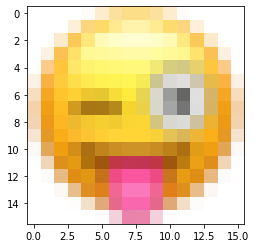

In [12]:
get_emoji_image(0,1090)

In [13]:
def get_emoji_ss(style_index, emoji_index):
    """
    Given a vendor style index (apple=0,facebook=1,google=2,twitter=3)
    and an emoji index, returns the 16x16 RGBA image as a Numpy array
    with shape (16,16,4).
    """
    # Your implementation here. Aim for 5-8 lines (not including comments).
    indexes={"0":"apple","1":"facebook","2":"google","3":"twitter"}
    # We made this dictionary to help us to convert the style index with number to the string of the styles because we are going
    # to use the png_files dictionary from the previous section in which the styles were stored in the string format
   # return plt.imshow(png_files[indexes[str(style_index)]][data[emoji_index]['sheet_y']*18:data[emoji_index]['sheet_y']*18+18,data[emoji_index]['sheet_x']*18:data[emoji_index]['sheet_x']*18+18,:])
    return (png_files[indexes[str(style_index)]][data[emoji_index]['sheet_y']*18+1:data[emoji_index]['sheet_y']*18+17,data[emoji_index]['sheet_x']*18+1:data[emoji_index]['sheet_x']*18+17,:])


In [14]:
get_emoji_ss(0,1090).shape

(16, 16, 4)

In [15]:
emoji_index=5
style_index=0

In [16]:
style_index=np.random.randint(0,4)
indexes={"0":"apple","1":"facebook","2":"google","3":"twitter"}
indexes[str(style_index)]

'twitter'

In [17]:
png_files[indexes[str(style_index)]]

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.23137255, 0.53333336, 0.7647059 , 0.5882353 ],
        [0.23137255, 0.53333336, 0.7647059 , 0.9647059 ],
        ...,
        [0.19215687, 0.21568628, 0.23921569, 0.        ],
        [0.19215687, 0.21568628, 0.23921569, 0.        ],
        [0.19215687, 0.21568628, 0.23921569, 0.        ]],

       [[0.19215687, 0.21568628, 0.23921569, 0.        ],
        [0.23137255, 0.53333336, 0.7647059 , 0.9647059 ],
        [0.23137255, 0.53333336, 0.7647059 , 1.        ],
        ...,
        [0.19215687, 0.21568628, 0.23921569, 0.        ],
        [0.19215687, 0.215686

In [18]:
data[1090]

{'name': 'FACE WITH STUCK-OUT TONGUE AND WINKING EYE',
 'unified': '1F61C',
 'non_qualified': None,
 'docomo': 'E728',
 'au': 'E4E7',
 'softbank': 'E105',
 'google': 'FE329',
 'image': '1f61c.png',
 'sheet_x': 33,
 'sheet_y': 20,
 'short_name': 'stuck_out_tongue_winking_eye',
 'short_names': ['stuck_out_tongue_winking_eye'],
 'text': ';p',
 'texts': [';p', ';-p', ';b', ';-b', ';P', ';-P'],
 'category': 'Smileys & Emotion',
 'subcategory': 'face-tongue',
 'sort_order': 25,
 'added_in': '0.6',
 'has_img_apple': True,
 'has_img_google': True,
 'has_img_twitter': True,
 'has_img_facebook': True}

**Implement *plot_emoji_styles*.** Implement the *plot_emoji_styles* function below, using your *get_emoji_image* function as a subroutine. Use *figsize* to control the size of your figure, use Matplotlib's *subplot* and *title* functions along with its **[suptitle](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.suptitle.html)** to create titles that show the emoji index, the emoji short name, and the vendor title above each style, as shown below:

<div style="margin-top:10px">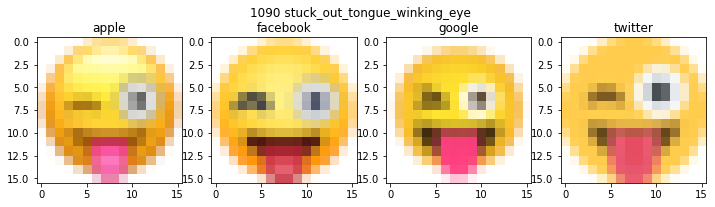</div>

In [19]:
def plot_emoji_styles(emoji_index):
    """Plots all four vendor styles of the given emoji."""
    # Your implementation here. Aim for 6-8 lines.
    indexes={"0":"apple","1":"facebook","2":"google","3":"twitter"}
    plt.figure(figsize=(15,5))
    plt.suptitle(str(emoji_index)+" "+str(data[emoji_index]["short_name"]))
    for style in range(4):
        plt.subplot(1, 4, style+1)
        get_emoji_image(style, emoji_index)
        plt.title(indexes[str(style)])    


**Run your *plot_emoji_styles*** function to plot the '*laughing*' emoji from **Q1b**. Also plot two other emojis of your choosing. (Except poop. You're not allowed to plot the poop emoji. Don't you dare. No, no wait stop, have some self-respect, don't do it, noooo!)

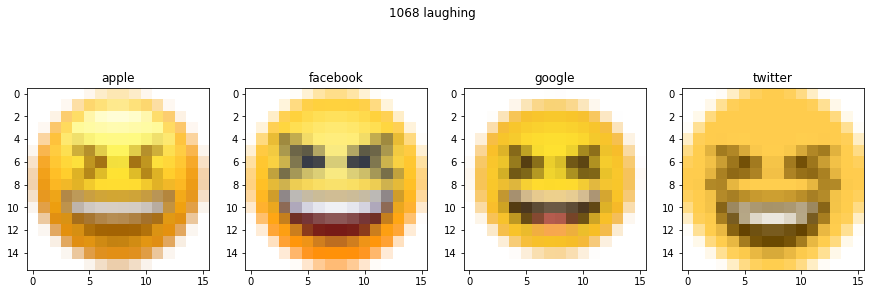

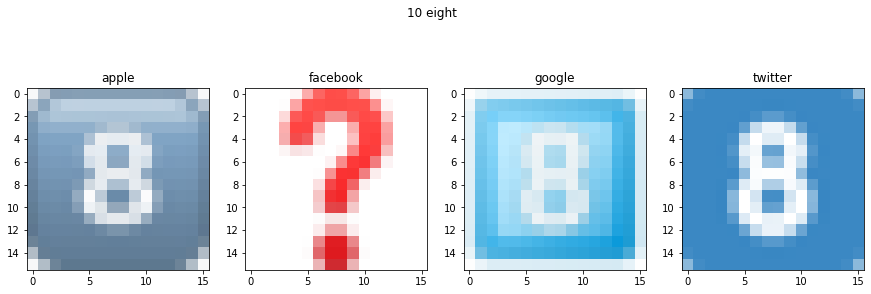

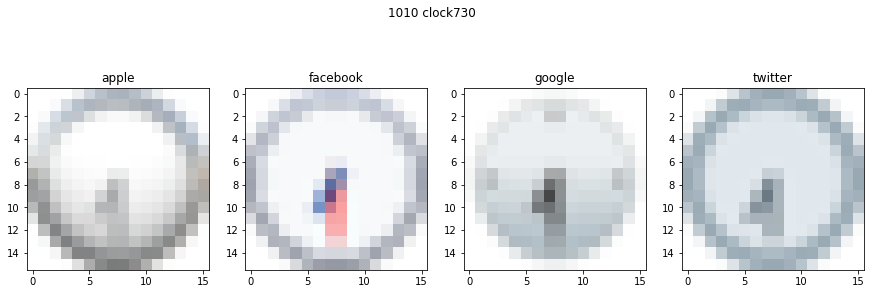

In [21]:
# Your code here. Aim for 2-3 lines.
plot_emoji_styles(index_laugh)
plot_emoji_styles(10)
plot_emoji_styles(1010)

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q2 &mdash; Build an emoji dataset for machine learning [20 marks total]

This question is about converting your list of four raw image sheets into a dataset $(\boldsymbol{X},\boldsymbol{y})$ suitable for training with scikit-learn. 

<div style="border-bottom: 1px solid black;"></div>

### *Q2a &mdash;  Build a set of inputs $\boldsymbol{X}$ from the sheet images [5 marks]*

**Write code** to build a Numpy array of inputs $\boldsymbol{X}$ having dtype *float32* and shape $(N,D)$ where $N$ is the total number of emoji images (number of emojis $\times$ number of vendors) and $D$ is the total number of pixels per emoji (height $\times$ width $\times$ channels). Each image should be converted from RGBA (4 channels) to RGB (3 channels) using the *rgba_to_rgb* function defined at the top of this lab. The first rows of $\boldsymbol{X}$ should all be apple emojis, followed by all facebook emojis, then all google emojis, and finally the last rows should be all twitter emojis. <span style="color:#080;font-weight:bold">Briefly comment each non-trivial line of your code.</span>

In [52]:
# Your answer here. Aim for 6-10 lines.

indexes={"0":"apple","1":"facebook","2":"google","3":"twitter"}

def get_emoji_array_rgb_2(style_index, emoji_index):
    """
    Given a vendor style index (apple=0,facebook=1,google=2,twitter=3)
    and an emoji array, returns the 16x16 RGBA image as a Numpy array
    with shape (16,16,3).
    """
    return rgba_to_rgb(png_files[indexes[str(style_index)]][data[emoji_index]['sheet_y']*18+1:data[emoji_index]['sheet_y']*18+17,data[emoji_index]['sheet_x']*18+1:data[emoji_index]['sheet_x']*18+17,:])
# This is the exact same location of the emoji with the that index

# We define an nd array and then fill it
X = np.zeros((4*1817,768))

# We use two for loop for emojies and vendors
for emoji_index in range(1817):
    X[emoji_index,:] = get_emoji_array_rgb_2(0,emoji_index).reshape(-1,)
for emoji_index in range(1817,1817*2):
    X[emoji_index,:] = get_emoji_array_rgb_2(1,emoji_index-1817).reshape(-1,)
for emoji_index in range(1817*2,1817*3):
    X[emoji_index,:] = get_emoji_array_rgb_2(2,emoji_index-1817*2).reshape(-1,)
for emoji_index in range(1817*3,1817*4):
    X[emoji_index,:] = get_emoji_array_rgb_2(3,emoji_index-1817*3).reshape(-1,)

**Plot a row of your $\boldsymbol{X}$.** Demonstrate to the TA that the rows of your $\boldsymbol{X}$ matrix is an emoji image. Do so by accessing a single row of $\boldsymbol{X}$ and plotting it as a $16 \times 16$ RGB image.

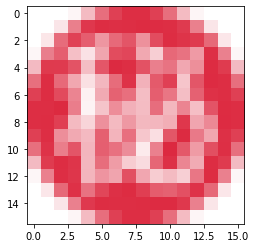

In [53]:
# Your answer here. Aim for 1-2 lines.
#plt.imshow(X[6].reshape(16,16,3))
plt.imshow(X[-1].reshape(16,16,3))

<div style="border-bottom: 1px solid black;"></div>

### *Q2b &mdash;  Build a set of targets $\boldsymbol{y}$ from the metadata [5 marks]*

Here you'll enumerate the distinct emoji categories, and then build a vector of integer targets $\boldsymbol{y}$.

**Write code** to get a list of distinct emoji categories, using the *category* field from the metadata. For the TA, ensure that your list of categories is also displayed when the code cell below is executed.

In [54]:
# Your answere here. Aim for 2-4 lines.
set1=[]
for item in range(len(data)):
    set1.append(data[item]['category'])
print(set(set1))

{'Objects', 'Food & Drink', 'Flags', 'Activities', 'Component', 'Smileys & Emotion', 'People & Body', 'Travel & Places', 'Animals & Nature', 'Symbols'}


**Write code** to build a Numpy array of inputs $\boldsymbol{y}$ having dtype *int32* and where $y_i \in \{0, \ldots, M-1\}$ with $M$ being the number of distinct emoji categories. The order of items in $\boldsymbol{y}$ should match those of $\boldsymbol{X}$ from **Q2a**. You may use any approach you like, but potentially useful functions include the *list* object's **[index](https://docs.python.org/3/tutorial/datastructures.html)** function and Numpy's **[np.tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html)** function. <span style="color:#080;font-weight:bold">Briefly comment each non-trivial line of your code.</span>

In [55]:
# Your answer here. Aim for 3-5 lines.
set2 = list(set(set1))
y = np.zeros((int((X.shape[0])/4),1))
for item in range(int((X.shape[0])/4)):
    y[item] = (set2).index(data[item]['category'])
y = np.tile(y, (4,1))

**Write code** to demonstrate that, for each training example $i$ corresponding to a '*laughing*' emoji (for apple, facebook, google, twitter), its $y_i$ label is set to be the index of the "Smileys & Emotion" category.

In [62]:
# Your answer here. Aim for 1-3 lines.
data[index_laugh]
index_laugh
v = 1068 *3
for item in (index_laugh,index_laugh+1817,index_laugh+1817*2,index_laugh+1817*3):
    print(y[item])
y

[5.]
[5.]
[5.]
[5.]


array([[9.],
       [9.],
       [9.],
       ...,
       [9.],
       [9.],
       [9.]])

<div style="border-bottom: 1px solid black;"></div>

### *Q2c &mdash;  Split and preprocess the data [10 marks]*

**Write code** to randomly split $(\boldsymbol{X}, \boldsymbol{y})$ into three parts, with no overlap:
1. a *training* set $(\boldsymbol{X}_\text{trn}, \boldsymbol{y}_\text{trn})$, which you will use to directly train classifiers
2. a *validation* set $(\boldsymbol{X}_\text{val}, \boldsymbol{y}_\text{val})$, which you will use to estimate the best value for a hyperparameter
3. a *test* set $(\boldsymbol{X}_\text{tst}, \boldsymbol{y}_\text{tst})$, which you will use to evaluate final performance of the 'best' hyperparameters

The training data should comprise 60% of the full data set. The validation and testing data should each comprise 20% of the original data. Use the **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** function and remember to set *random_state* so that your splits (and thereby your conclusions) are reproducible for TAs.

In [87]:
len(X1) 

5814

In [75]:
X_trn, X_val, X_tst, y_trn, y_val, y_tst = train_test_split(X, y, test_size=0.2, train_size=0.6, random_state=0)

ValueError: not enough values to unpack (expected 6, got 4)

In [88]:
# Your code here. Aim for 2-3 lines.
# Because the 60% and 20% of 7268 is not integer we try to round it and use the absoulte values instead of proportion
# len(X)=7268 * 0.2 = 1453.6 we make it 1454 and we round the 60% to 4360
X1, X_tst, y1, y_tst = train_test_split(X,y,test_size=1454,train_size=5814)
X_trn, X_val, y_trn, y_val = train_test_split(X1,y1,test_size = 1454,train_size =4360)


**Write code** to normalize the features of $\boldsymbol{X}_\text{trn}$, $\boldsymbol{X}_\text{val}$, and $\boldsymbol{X}_\text{tst}$, using scikit-learn's **[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**. Be careful which subset of the data you use for estimating the *StandardScaler* object's *scale_* and *mean_* attributes.

In [90]:
# Your answer here. Aim for 4-5 lines.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_trn)
X_trn_n = scaler.transform(X_trn)
X_val_n = scaler.transform(X_val)
X_tst_n = scaler.transform(X_tst)

**Plot a scaled and unscaled emoji side-by-side.** Choose a row from $\boldsymbol{X}_\text{trn}$ and show how it appears as an RGB image with and without scaling. If Matplotlib complains that "values are not in range [0,1]," consider using **[np.clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)**. Your plot should look similar to the example below, although the choice of emoji could differ.

<div style="margin-top:10px">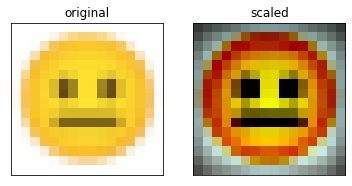</div>

*Hint:* You do not need to know which row in $\boldsymbol{X}_\text{trn}$ corresponds to which row in $\boldsymbol{X}$. Instead you can "undo" the scaling on whatever row you pick, using one of the methods provided by *StandardScaler*.

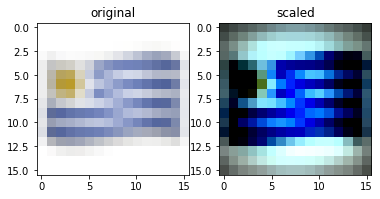

In [117]:
# Your answer here. Aim for 9-12 lines
plt.subplot(1, 2, 1)
plt.title("original")
plt.imshow(X_trn[20].reshape(16,16,3))
plt.subplot(1, 2, 2)
plt.title("scaled")
plt.imshow(np.clip(X_trn_n[20].reshape(16,16,3),0,1));

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q3 &mdash; Train classifiers and identify good hyperparameters [20 marks total]

This question has several goals:
1. to help you visualize how hyperparameters affect training/validation/test performance.
2. to give you a sense for how long certain classifiers take to train or to make predictions.
3. to force you to try two useful Python language features: (a) passing types as arguments, and (b) argument forwarding.

(However, please take the hyperparameter search lab as a better example of how to use scikit-learn for hyperparameter search; this assignment is focused on making things easy to plot and visualize, not on automating the search itself.)

<div style="border-bottom: 1px solid black;"></div>

### *Q3a &mdash;  Write a utility function that trains multiple estimators [5 marks]*

Throughout **Q3**, you will be training multiple estimators, each with a different hyperparameter setting.

**Implement the *train_estimators* utility function.** The idea of this function is to make it easy to train multiple versions of an estimator where one hyperparameter (specified by *param_name*) gets to take on a different value (specified by *param_vals*) for each instance. See the docstring below. *Hint:* Look at scikit-learn's [BaseEstimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) class documentation.

In [ ]:
def train_estimators(base_estimator, X, y, param_name, param_vals):
    """
    Trains multiple instances of `base_estimator` on (X, y) where for each instance
    the parameter named `param_name` is set to a value from `param_vals`.
    Prints a message before training each instance.
    Returns the list of trained estimators.
    
    For example:
    
       >>> train_estimators(DecisionTreeClassifier(splitter='random', random_state=0),
                            X, y, 'max_depth', [1, 5, 10])
    
       Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
       Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...

       [DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random'),
        DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')] 
    """
    # Your implementation here. Aim for 5-10 lines.

**Run the code cell below** to test your implementation of *train_estimators*. (Replace *X_trn* and *y_trn* with whatever you called your training set variables.)

In [ ]:
tree_estimators = train_estimators(sklearn.tree.DecisionTreeClassifier(splitter='random', random_state=0),
                                   X_trn, y_trn, 'max_depth', [1, 5, 10])
tree_estimators

<div style="border-bottom: 1px solid black;"></div>

### *Q3b &mdash;  Train multiples models, plot their accuracies, and identify good parameters [15 marks]*

**Implement the *score_estimators* utility function.** This will be handy for scoring a list of estimators on a particular data set, such as $(\boldsymbol{X}_\text{trn}, \boldsymbol{y}_\text{trn})$. Use the estimator's own *score* method.

In [ ]:
def score_estimators(X, y, estimators):
    """Scores each estimator on (X, y), returning a list of scores."""
    # Your implementation here. Aim for 1-4 lines.

**Run the code cell below** to test your implementation. It should print three scores per dataset. Each score is a measure of classification accuracy. (Replace *X_trn* and *y_trn* etc with your dataset variable names.)

In [ ]:
print("train:   ", score_estimators(X_trn, y_trn, tree_estimators))
print("validate:", score_estimators(X_val, y_val, tree_estimators))
print("test:    ", score_estimators(X_tst, y_tst, tree_estimators))

You should see that the 3rd column (corresponding to *max_depth=15*) performs best, especially on training.

**Run the code cell below** to see a demonstration of the `%%time` feature of Jupyter (see [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time)). Note that `%%time` only works if it is the first line in a code cell, before any comments.

In [ ]:
%%time
for i in range(1000000):  # Burn some CPU cycles in a
    pass                  # loop that does nothing

**Train multiple *DecisionTreeClassifier*s** on the training set, such that *train_estimators* produces the following output:

    Training DecisionTreeClassifier(max_depth=1, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=5, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=10, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=20, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=50, random_state=0, splitter='random')...
    Training DecisionTreeClassifier(max_depth=100, random_state=0, splitter='random')...

In [ ]:
%%time
# Your answer here. Aim for 1-2 lines.

**Implement *plot_estimator_scores*** to visualize the effect of the parameter on accuracy. When applied to the decision tree estimators you trained in the previous cell, the plot should look like below, including legend, colours, marks, and x-axis ticks, but your precise scores may differ depending on how you decided to split the data.

<div style="margin-top:10px">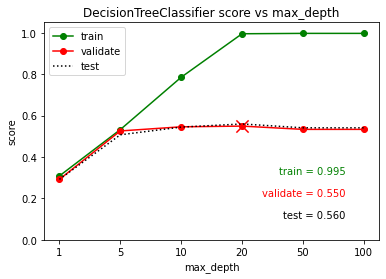</div>

*Hint:* You can use your *score_estimators* implementation, but do not do any training.

*Hint:* For the title, you can get the object's type from its `__class__` attribute, and you can get the name of its type from the type's `__name__` attribute. Use the first object in *estimators* to determine the name of the classifier type that you're plotting.

*Hint:* If your $x$-axis points are not evenly spaced, you can plot each series using any evenly-spaced $x$ values (e.g. via *np.arange*) and then override the $x$-axis tick labels with whatever you want. See the *labels* argument of Matplotlib's **[xticks](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html)** function.

In [ ]:
def plot_estimator_scores(estimators, param_name, param_vals):
    """
    Plots the training, validation, and testing scores of a list of estimators,
    where `param_name` and `param_vals` are the same as for `train_estimators`.
    The estimator with best validation score will be highlighted with an 'x'.
    """
    # Your implementation here. Use as many lines as you need.

**Plot the *DecisionTreeClassifier* scores** by calling your *plot_estimator_scores* function. Your plot should look like the example plot.

In [ ]:
%%time
# Your code here. Aim for 1 line.

**Train multiple *RandomForestClassifiers*** such that *train_estimators* produces the following output:

    Training RandomForestClassifier(max_depth=1, random_state=0)...
    Training RandomForestClassifier(max_depth=5, random_state=0)...
    Training RandomForestClassifier(max_depth=10, random_state=0)...
    Training RandomForestClassifier(max_depth=20, random_state=0)...
    Training RandomForestClassifier(max_depth=50, random_state=0)...
    Training RandomForestClassifier(max_depth=100, random_state=0)...

In [ ]:
%%time
# Your code here. Aim for 1-2 lines.

**Plot the *RandomForestClassifier* scores**, again by calling your *plot_estimator_scores* function.

In [ ]:
%%time
# Your code here. Aim for 1 line.

**Train multiple *LogisticRegression* classifiers** such that *train_estimators* produces the following output:

    Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
    Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
    Training LogisticRegression(max_iter=10000, random_state=0)...
    
The omission of *C* when the final estimator was printed means it was trained with its default value, which is *C*=1. For example:
```python
>>> LogisticRegression(C=1.01)
LogisticRegression(C=1.01)

>>> LogisticRegression(C=1.0)
LogisticRegression()
```

In [ ]:
%%time
# Your code here. Aim for 1-2 lines

**Plot the *LogisticRegression* scores**, again by calling your *plot_estimator_scores* function.

In [ ]:
%%time
# Your code here. Aim for 1 line.

**Train multiple SVM classifiers (*SVC*)** such that *train_estimators* produces the following output:

    Training SVC(C=0.01, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=0.1, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=10.0, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=100.0, gamma=0.001, max_iter=10000, random_state=0)...
    Training SVC(C=1000.0, gamma=0.001, max_iter=10000, random_state=0)...

In [ ]:
%%time
# Your code here. Aim for 1-2 lines.

**Plot the *SVM* scores**, again by calling your *plot_estimator_scores* function. Predictions may take several minutes to compute.

In [ ]:
%%time
# Your code here. Aim for 1 line.

**Question.** Do your plots support the claim that "validation set performance" is a good estimate of "test set performance" overall? YES/NO then explain below.

**Question.** Which of your classifiers had the highest test-set performance for its "best" configuration (i.e., for the configuration with highest validation-set performance)? Name the classifier and best hyperparameter setting (*max_depth* or *C*).

**Question.** Which of your classifiers had the *least over-fitting*, if we measured overfitting as the absolute difference between training-set and testing-set performance? Name the classifier and hyperparameter setting (*max_depth* or *C*).

**Question.** Which if your classifiers was slowest to train? Name the classifier.

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q4 &mdash; Visualizing mistakes [10 marks total]

The goal here is to visualize classification errors, by confusion matrix and by inspecting typical mistakes.

<div style="border-bottom: 1px solid black;"></div>

### *Q4a &mdash;  Plot a confusion matrix for the best estimators [5 marks]*

**Write code** to plot a confusion matrix for each of the 'best' estimators in **Q3** when applied to test set $(\boldsymbol{X}_\text{tst}, \boldsymbol{y}_\text{tst})$. Here, 'best' means best validation score. All estimators are already trained, so you can simply pull out the one best of each type {tree, forest, logistic, svm}. Use **[plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)** or **[ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)**. Your first plot should look like as below, though the numbers may differ.

<div style="margin-top:10px">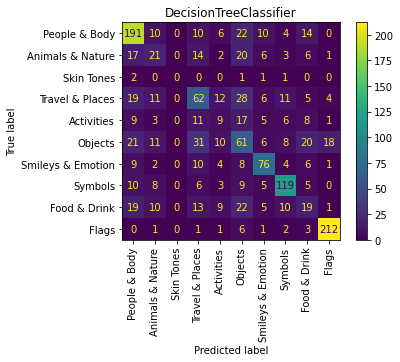</div>

In [ ]:
# Your answer here. Aim for 7-12 lines.

**Question.** What classifier is best at distinguishing between the *Flags* class and the *Objects* class, overall? Name the classifier and justify your choice.

<div style="border-bottom: 1px solid black;"></div>

### *Q4b &mdash;  Identify specific misclassified examples [5 marks]*

In this question, use the "best performing" classifier that you named at the end of **Q4a**.

**Write code** to identify all "*Objects* misclassified as *Flags*" from the test-set and then plot them as images. (The phrase "*A* misclassified as *B*" means the prediction was *B* but the true class was *A*.) Your code for identifying the misclassified examples should be vectorized, for example using functions like *np.logical_and* and/or *np.nonzero*. (Remember you might need to "undo" the feature normalization like in **Q2c**).

In [ ]:
# Your answer here. Aim for 7-12 lines.

**Question.** After seeing the failure cases above, can you guess why the estimator is confusing them with *Flags*? Explain in 1-2 sentences.

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q5 &mdash; Visualizing feature importances [10 marks total]

The goal here is to visualize sensitivity to specific input features.

<div style="border-bottom: 1px solid black;"></div>

### *Q5a &mdash;  Visualize the feature importances of a RandomForestClassifier [5 marks]*

**Implement *plot_random_forest_importances*** below. This function should plot the *feature_importances_* attribute of a *RandomForestClassifier* (see scikit-learn docs). For the random forests you trained, there are $16 \times 16 \times 3$ features, so to make visualization easy the feature importances should be organized into three separate side-by-side heatmaps: one for each RGB colour channel. When plotting a heatmap, use *cmap*='cool' to choose the colour map. For example, plotting the feature importances of a random forest with *max_depth*=1 should look something like this:

<div style="margin-top:10px">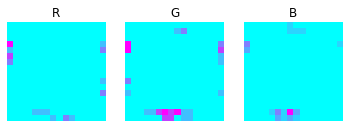</div>

In [ ]:
def plot_random_forest_importances(estimator):
    """
    Plots the feature importances of the given RandomForestClassifier,
    arranged as three separate 16x16 heatmaps for (red, green, blue).
    """
    # Your implementation here. Aim for 7-10 lines.

**Check your code** by calling your function to plot the feature importances of first *RandomForestClassifier* that you trained (with *max_depth*=1).

In [ ]:
# Your code here (1 line)

**Plot the feature importances** of your 'best' *RandomForestClassifier* instance. The patterns should be more complex.

In [ ]:
# Your code here (1 line)

**Question.** Why do you think the features near the edge of the image so 'important'? Explain in 1-2 sentences.

<div style="border-bottom: 1px solid black;"></div>

### *Q5b &mdash;  Visualize the feature weights of LogisticRegression [5 marks]*

This question is essentially the same as **Q5a** except you will extract the per-class weights of a *LogisticRegression* estimator that was trained on emoji images.

**Implement *plot_logistic_weights*** so that for each of the 10 categories of emoji it plots three side-by-side images.  Use the *coef_* attribute of *LogisticRegression* to extract the $16 \times 16 \times 3$ weights for each category, and then generate a separate heatmap for each RGB channel. Since we want to see clearly which weights are positive or negative, use *cmap*='bwr' when plotting each heatmap. Use *suptitle* to label each group of heatmaps with its category label. Your function should generate $10 \times 3$ heatmaps total. Below are examples of 2 of the 10 possible rows:

<div style="margin-top:10px">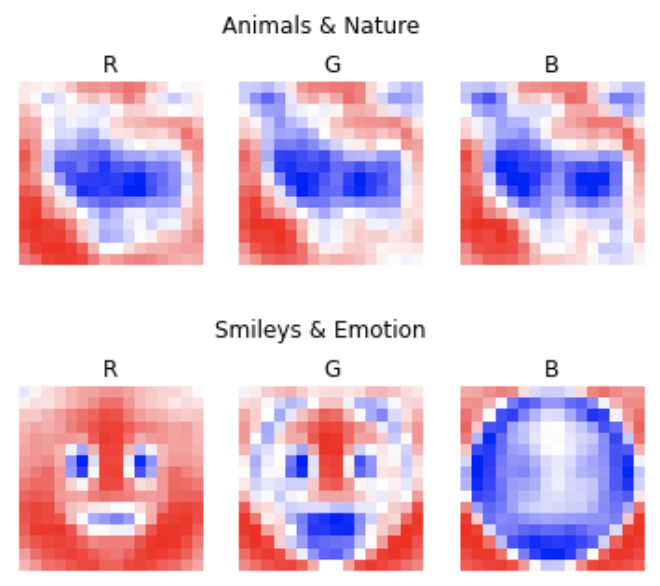</div>

*Hint:* Note that the $i^\text{th}$ set of weights may not match the order of categories. Use the *classes_* attribute of *LogisticRegression* to recover the category index.

In [ ]:
def plot_logistic_weights(estimator):
    """
    Plots heatmaps showing the weights of the LogisticRegression estimator,
    with a separate plot for each class and for each colour channel.
    """
    assert isinstance(estimator, sklearn.linear_model.LogisticRegression)
    # Your implementation here here. Aim for 9-12 lines.

**Check your code** by calling your function to plot the weights of the *LogisticRegression* classifier having *strongest* regularization (the one with *C*=1e-5).

In [ ]:
# Your code here (1 line)

**Plot the weights** of your 'best' *LogisticRegression* instance.

In [ ]:
# Your code here (1 line)

**Question.** Was your best-performing *LogisiticRegression* classifier also the most interpretable? YES/NO then explain in 2-3 sentences.

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black"></div>

# Q6 &mdash; Maximize the expected test-time performance of a DecisionTreeClassifier [10 marks]

In Q3, you plotted the effect of a lone hyperparameter on training, validation, and testing scores. But, you did not do a full hyperparameter search on any of the models.

In Q6, you should do a full hyperparameter search on a *DecisionTreeClassifier*, and demonstrate whether a full hyperparameter search can increase testing scores. Specifically, you will use *RandomizedSearchCV*.

First, **write a line of code** to split the full (unnormalized) emoji data set into 80% training and 20% testing. Your test set should be identical to Q2c but, unlike Q2c, do not normalize and do not further split the training data into a validation set. (You do not need to normalize the emoji pixels because decision tree is not affected by it anyway!)

In [ ]:
# Your code here. Aim for 1 line, similar to Q2c.

Next, **write a few lines of code** to:
1. define a hyperparameter search space for a *DecisionTreeClassifier* and
2. find the best hyperparameters using *RandomizedSearchCV*.

Some specifics:
* Choose **at least four** *DecisionTreeClassifier* hyperparameters to search over, and choose a list of values for each.
* Configure *RandomizedSearchCV* to evaluate **at least 20** distinct hyperparameter settings (i.e., at least 20 samples from your search space).
* Configure *RandomizedSearchCV*'s to score each hyperparameter sample via **4-fold** cross validation. This matches the "60%/20%" training/validation ratio you manually did in Q3, but now *RandomizedSearchCV* does the split internally.



In [ ]:
%%time
# Your answer here.

**Print the best hyperparameters** that were found by your search, one hyperparameter per line.

In [ ]:
# Your answer here. Aim for 2 lines.

Finally, **print the validation, training, and testing scores** 
```
cross-validation score of best hyperparameters:             0.???
training score of model trained using best hyperparameters: 0.???
testing score of model trained using best hyperparameters:  0.???
```
Your code cell should reproduce the above, but with the 3-digits numbers filled in. (Hint: You do not need to fit a new tree yourself to do this step.)

In [ ]:
# Your answer here. Aim for 3 lines.

**Question.** Was the cross-validation score of your Q6 hyperparameter search better than the best validation score from your *DecisionTreeClassifier* search in Q3b? If so, what was the absolute percentage of improvement in accuracy? If not, why not?